<a href="https://colab.research.google.com/github/antoniogss/web_scrapping/blob/main/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import google.colab as gc

In [104]:
!pip3 install snscrape
gc.output.clear()
import snscrape as sns
import snscrape.modules.twitter as sntw

In [117]:
maxTweets = 1000
i = 0
tweets_list = []
for tweet in sntw.TwitterSearchScraper('Universidade Pública since:2022-10-02 until:2022-10-07').get_items():
  if i > maxTweets:
    break
  tweets_list.append([tweet.date, tweet.url, tweet.user.username, tweet.content])
  i = i + 1

In [118]:
# tweets_list

In [119]:
df = pd.DataFrame(tweets_list,columns=['date','url','username','content'])

In [120]:
# df.head()

In [121]:
import nltk
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
gc.output.clear()

In [122]:
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words = stop_words + list([ ',','.','https', ':','!', '#', '@', '?', '/', 
                                'O', 'vai', '|', '–','pra', 'a', 'e', '-', 't', 
                                'CO', 'C0', 'co', 'sobre'])

In [123]:
def remove_stopwords(x):
  word_tokens = nltk.word_tokenize(x)
  filtered_sentence = ' '.join([w for w in word_tokens if not (w in stop_words or len(w)<4)]) 
  return filtered_sentence

In [124]:
df['filtered_text'] = df['content'].apply(lambda x: remove_stopwords(x))

In [125]:
df['filtered_text'].head()

0    péssimo momento finalizar curso universidade p...
1    liga universidade publica brasil //t.co/QLwUEf...
2    profanegra serenidade convicção filha precisar...
3           bolso quer PRIVATIZAR universidade pública
4    repugnante alguém estuda universidade pública ...
Name: filtered_text, dtype: object

In [126]:
string = pd.Series(df['filtered_text'].values).str.cat(sep=' ')
# string

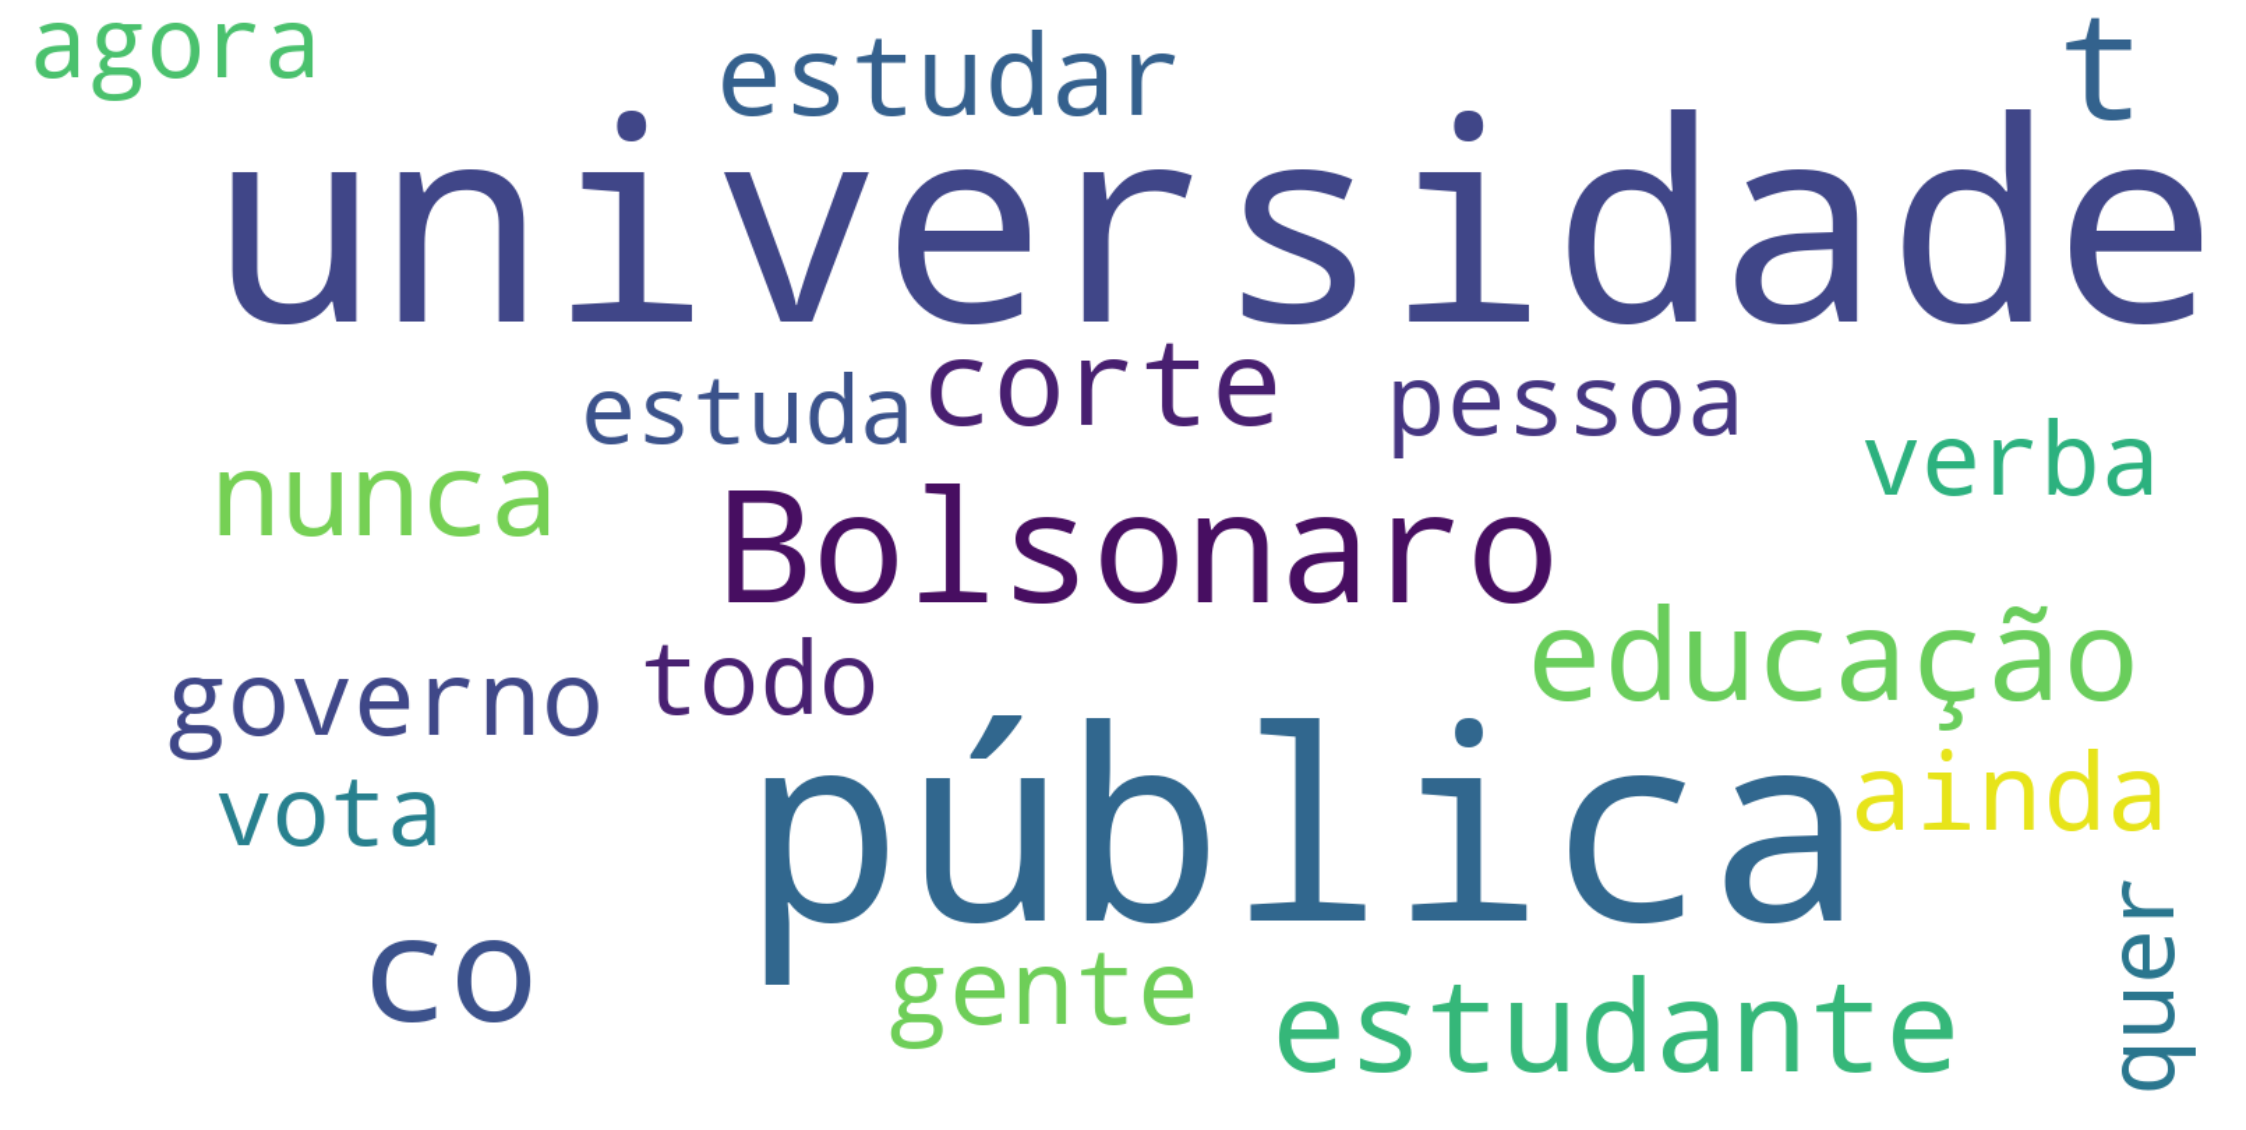

In [127]:
wordcloud = WordCloud(width=1600,height=800,max_font_size=200,
                      max_words=20,collocations=False, 
                      background_color='white').generate(string)
                      
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [128]:
pd.Series(' '.join(df['filtered_text'].str.lower()).split()).value_counts()[:20]

universidade     1051
pública           990
bolsonaro         170
educação          107
nunca              92
estudante          84
estudar            83
ainda              74
gente              72
governo            71
agora              64
corte              63
vota               63
quer               59
lula               57
estuda             56
publica            55
dinheiro           54
entrar             50
universidades      47
dtype: int64